In [1]:
import streamlit as st
from PyPDF2 import PdfReader
import yaml, os, openai, textwrap
from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.vectorstores import FAISS
from langchain.vectorstores import Chroma
from InstructorEmbedding import INSTRUCTOR
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader
from langchain.memory import ConversationBufferMemory
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.chains import ConversationalRetrievalChain
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter
from html_template import css, bot_template, user_template

with open('cadentials.yaml') as f:
    credentials = yaml.load(f, Loader=yaml.FullLoader)

os.environ['OPENAI_API_KEY'] = credentials['OPENAI_API_KEY']
os.environ['HUGGINGFACEHUB_API_TOKEN'] = credentials['HUGGINGFACEHUB_API_TOKEN']
os.environ['ENGINE'] = credentials['ENGINE']

openai.api_key = credentials['OPENAI_API_KEY']
openai.api_base = credentials['OPENAI_API_BASE']
openai.api_type = credentials['OPENAI_API_TYPE']
openai.api_version = credentials['OPENAI_API_VERSION']
openai.engine = credentials['ENGINE']

bge_embeddings = HuggingFaceBgeEmbeddings(
                                        model_name="BAAI/bge-base-en",
                                        model_kwargs={'device': 'mps'},
                                        encode_kwargs={'normalize_embeddings': True} # set True to compute cosine similarity
                                        )


openai_llm = ChatOpenAI(
                        openai_api_key=os.environ["OPENAI_API_KEY"],
                        engine = os.environ["ENGINE"],
                        model='gpt-3.5-turbo',
                        temperature=0.9, 
                        max_tokens = 256
                        )

/Users/1zuu/anaconda3/envs/llm/lib/python3.10/site-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange
/Users/1zuu/anaconda3/envs/llm/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


WARNING! engine is not default parameter.
                    engine was transferred to model_kwargs.
                    Please confirm that engine is what you intended.


In [3]:
prompt_template = """
I want you to act as a naming consultant for new restaurants.

Return a list of restaurant names. Each name should be short, catchy and easy to remember. It shoud relate to the type of restaurant you are naming.

What are some good names for a restaurant that is {restaurant_desription}?
"""

prompt = PromptTemplate(
                        input_variables=["restaurant_desription"],
                        template=prompt_template,
                        )

AttributeError: 'ChatOpenAI' object has no attribute 'prompt_template'

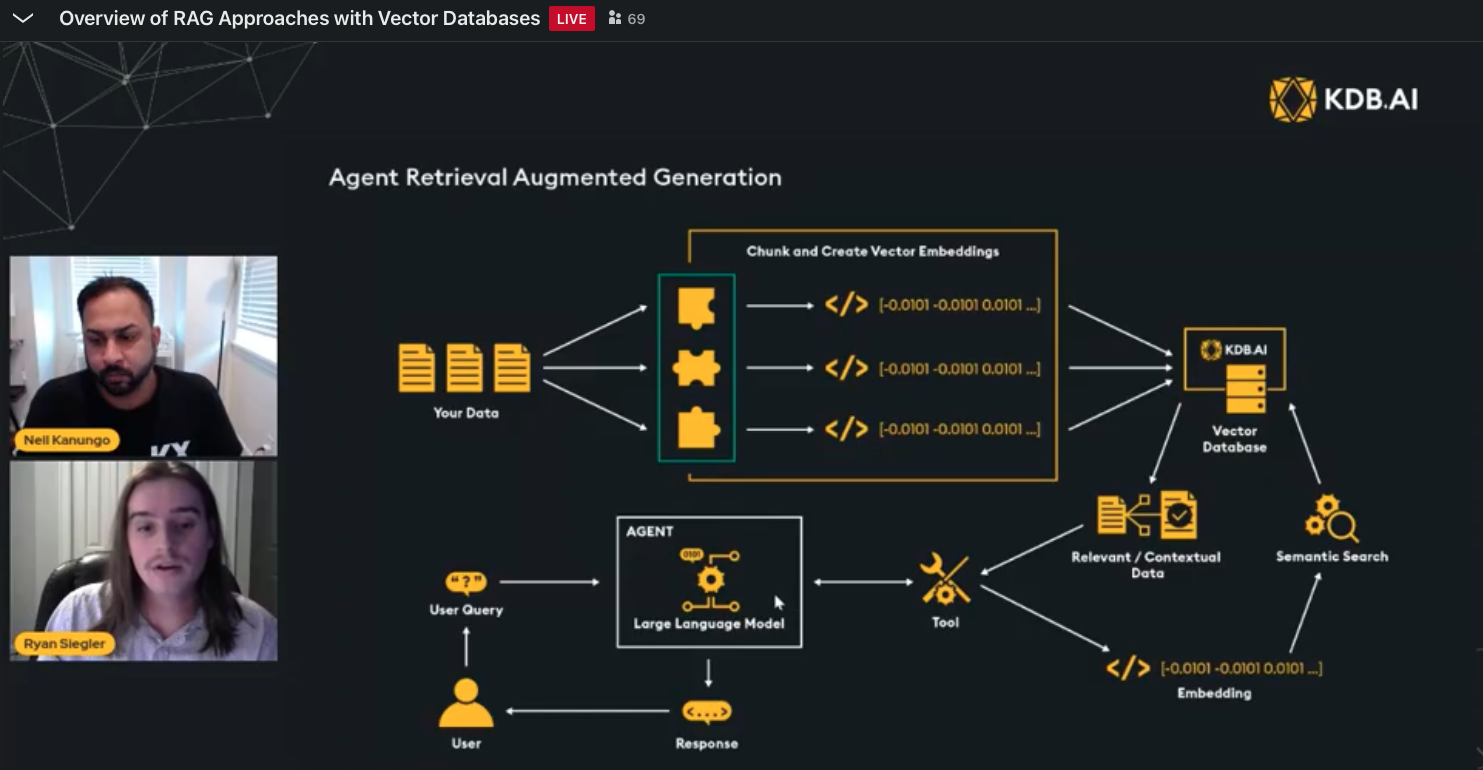

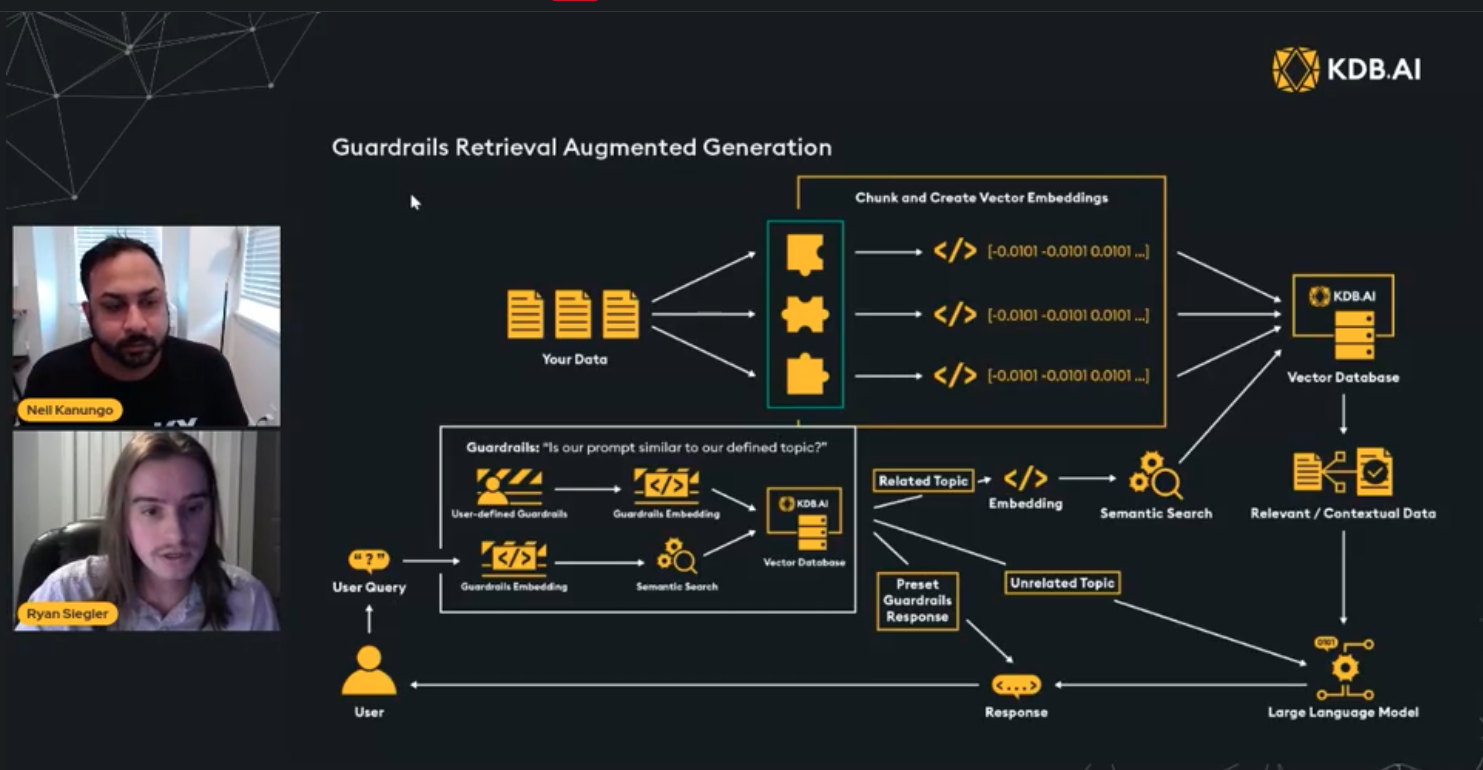

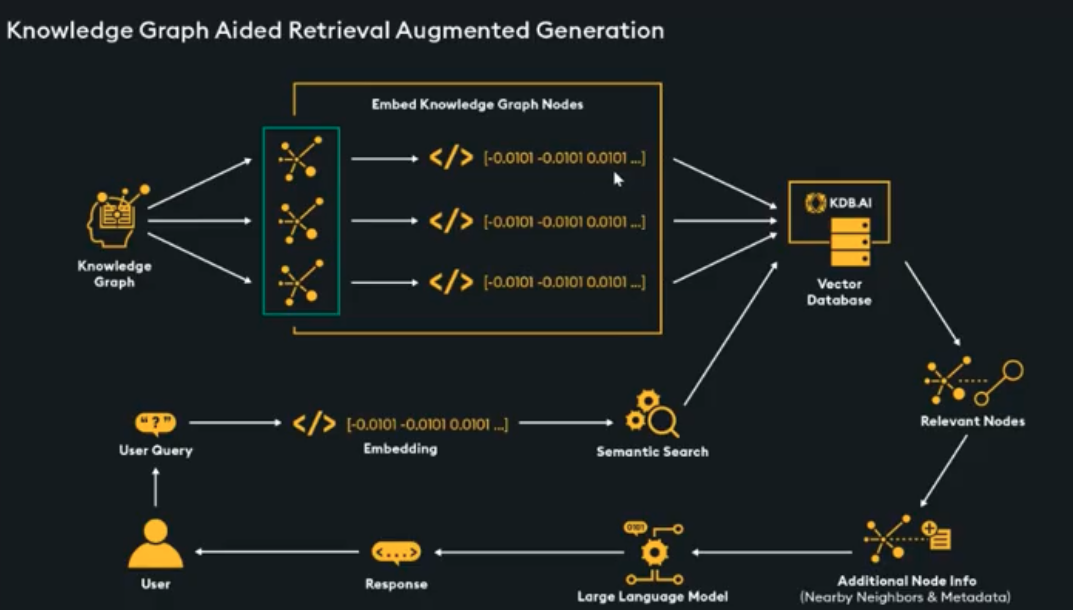

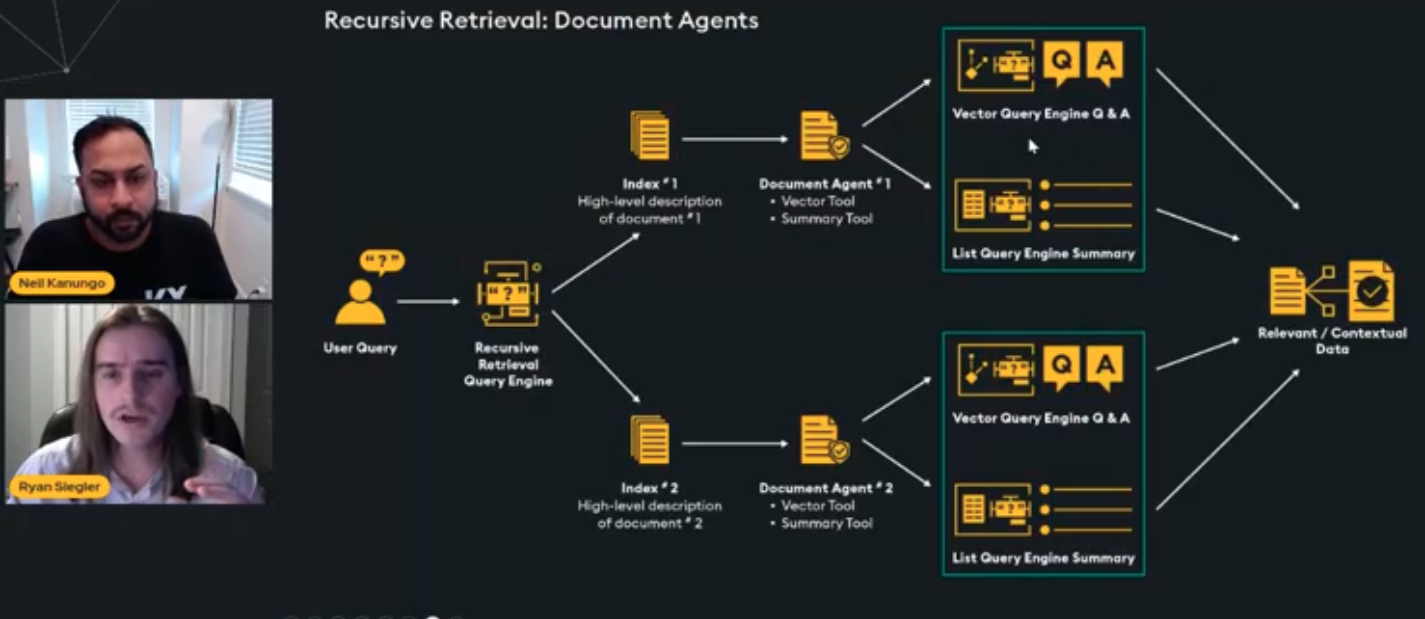

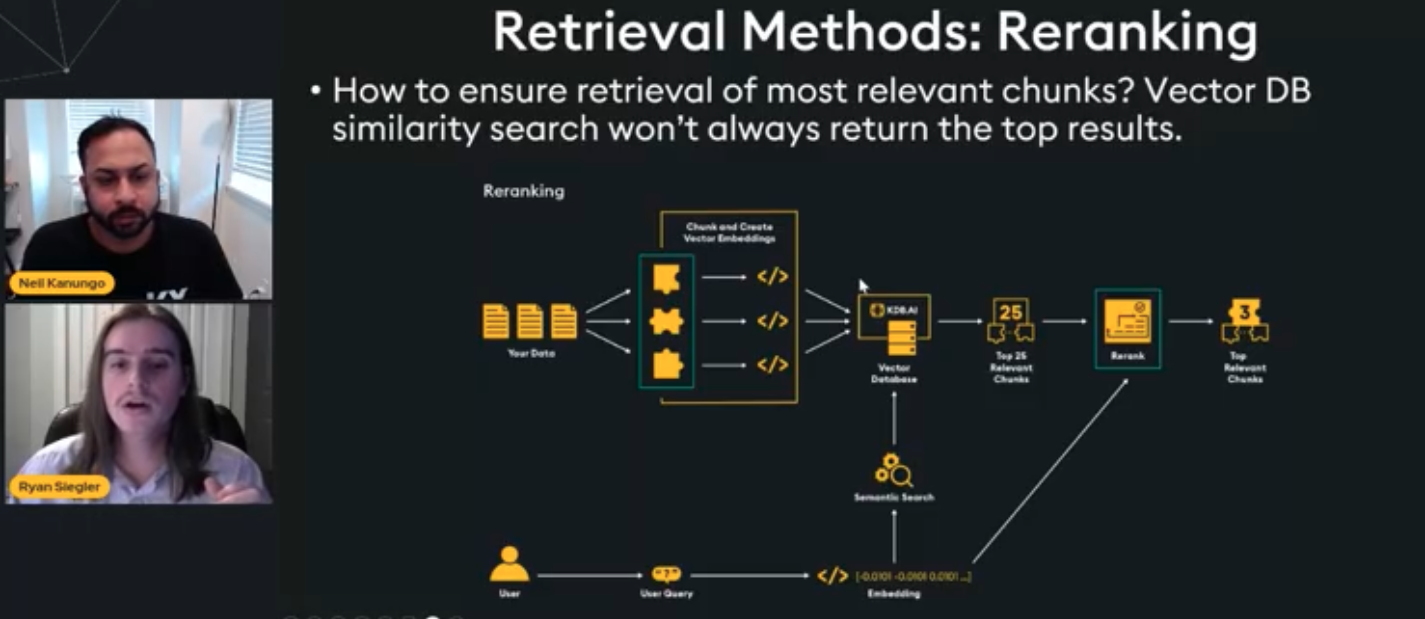